# Options

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Read the data

[source](https://github.com/datasets/covid-19/tree/main)

In [3]:
df = pd.read_csv(os.path.join('data','portugal_covid.csv'))

In [4]:
# Let's create some additional columns
df['new_confirmed'] = df.Confirmed.diff().fillna(0)
df['new_deaths'] = df.Deaths.diff().fillna(0)
df['new_recovered'] = df.Recovered.diff().fillna(0)

df.head(5)

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths,new_confirmed,new_deaths,new_recovered
0,2020-01-22,Portugal,NaN,0,0.0,0,0.0,0.0,0.0
1,2020-01-23,Portugal,NaN,0,0.0,0,0.0,0.0,0.0
2,2020-01-24,Portugal,NaN,0,0.0,0,0.0,0.0,0.0
3,2020-01-25,Portugal,NaN,0,0.0,0,0.0,0.0,0.0
4,2020-01-26,Portugal,NaN,0,0.0,0,0.0,0.0,0.0


In [5]:
df.dtypes

Date               object
Country/Region     object
Province/State    float64
Confirmed           int64
Recovered         float64
Deaths              int64
new_confirmed     float64
new_deaths        float64
new_recovered     float64
dtype: object

Date is a string type. Let's convert to a datetime!

In [6]:
date_as_timestamp = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [7]:
date_as_timestamp

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
786   2022-04-12
787   2022-04-13
788   2022-04-14
789   2022-04-15
790   2022-04-16
Name: Date, Length: 791, dtype: datetime64[ns]

## Common methods that are useful in datetime Series

In [8]:
date_as_timestamp.min()

Timestamp('2020-01-22 00:00:00')

In [9]:
date_as_timestamp.max()

Timestamp('2022-04-16 00:00:00')

In [11]:
date_as_timestamp.dt.day

0      22
1      23
2      24
3      25
4      26
       ..
786    12
787    13
788    14
789    15
790    16
Name: Date, Length: 791, dtype: int32

In [12]:
date_as_timestamp.dt.month

0      1
1      1
2      1
3      1
4      1
      ..
786    4
787    4
788    4
789    4
790    4
Name: Date, Length: 791, dtype: int32

and many others ....

In [13]:
new = pd.DataFrame()
new['date'] = date_as_timestamp
new['day'] = new['date'].dt.day
new['month'] = new['date'].dt.month
new['year'] = new['date'].dt.year
new['hour'] = new['date'].dt.hour
new['minute'] = new['date'].dt.minute
new['second'] = new['date'].dt.second
new['day of the week'] = new['date'].dt.weekday
new['day of the week name'] = new['date'].dt.day_name()
new['quarter'] = new['date'].dt.quarter
new['is it a leap year?'] = new['date'].dt.is_leap_year

new.head(5)

,date,day,month,year,hour,minute,second,day of the week,day of the week name,quarter,is it a leap year?
0,2020-01-22,22,1,2020,0,0,0,2,Wednesday,1,True
1,2020-01-23,23,1,2020,0,0,0,3,Thursday,1,True
2,2020-01-24,24,1,2020,0,0,0,4,Friday,1,True
3,2020-01-25,25,1,2020,0,0,0,5,Saturday,1,True
4,2020-01-26,26,1,2020,0,0,0,6,Sunday,1,True


# Selecting Time Series data

When you read a csv and have a date column, overwrite it with pandas' `.to_datetime` transformation

In [14]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df.head(3)

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths,new_confirmed,new_deaths,new_recovered
0,2020-01-22,Portugal,NaN,0,0.0,0,0.0,0.0,0.0
1,2020-01-23,Portugal,NaN,0,0.0,0,0.0,0.0,0.0
2,2020-01-24,Portugal,NaN,0,0.0,0,0.0,0.0,0.0


In [15]:
df.dtypes

Date              datetime64[ns]
Country/Region            object
Province/State           float64
Confirmed                  int64
Recovered                float64
Deaths                     int64
new_confirmed            float64
new_deaths               float64
new_recovered            float64
dtype: object

In [18]:
# run this cell only once, because after the first execution this cell will fail
df = df.set_index('Date').sort_index() # always sort the index when you place a date column there

KeyError: "None of ['Date'] are in the columns"

In [20]:
df.head(3)

,Country/Region,Province/State,Confirmed,Recovered,Deaths,new_confirmed,new_deaths,new_recovered
Date,,,,,,,,
2020-01-22,Portugal,NaN,0,0.0,0,0.0,0.0,0.0
2020-01-23,Portugal,NaN,0,0.0,0,0.0,0.0,0.0
2020-01-24,Portugal,NaN,0,0.0,0,0.0,0.0,0.0


Let's see some out-of-the-box methods for a datetime index/column

We can still access the `datetime` methods even though our date values are in the index now

In [21]:
print('We have data between %s and %s' % (df.index.min(), df.index.max()))

We have data between 2020-01-22 00:00:00 and 2022-04-16 00:00:00


## You can select data in a natural language format

In [23]:
df.loc['January 5th 2021',:] 

Country/Region    Portugal
Province/State         NaN
Confirmed           436579
Recovered         349110.0
Deaths                7286
new_confirmed       4956.0
new_deaths            90.0
new_recovered       4691.0
Name: 2021-01-05 00:00:00, dtype: object

In [25]:
df.loc['January 5 2021'] 

Country/Region    Portugal
Province/State         NaN
Confirmed           436579
Recovered         349110.0
Deaths                7286
new_confirmed       4956.0
new_deaths            90.0
new_recovered       4691.0
Name: 2021-01-05 00:00:00, dtype: object

In [26]:
df.loc['Jan 5th 2021'] 

Country/Region    Portugal
Province/State         NaN
Confirmed           436579
Recovered         349110.0
Deaths                7286
new_confirmed       4956.0
new_deaths            90.0
new_recovered       4691.0
Name: 2021-01-05 00:00:00, dtype: object

In [27]:
df.loc['2021 Jan 5'] 

Country/Region    Portugal
Province/State         NaN
Confirmed           436579
Recovered         349110.0
Deaths                7286
new_confirmed       4956.0
new_deaths            90.0
new_recovered       4691.0
Name: 2021-01-05 00:00:00, dtype: object

You don't have to be specific about the dates, let's go for the whole month of January

In [28]:
df.loc['January 2021'].head(5)   # <--- wait, you can do that???

,Country/Region,Province/State,Confirmed,Recovered,Deaths,new_confirmed,new_deaths,new_recovered
Date,,,,,,,,
2021-01-01,Portugal,NaN,420629,338668.0,6972,6951.0,66.0,4392.0
2021-01-02,Portugal,NaN,423870,340150.0,7045,3241.0,73.0,1482.0
2021-01-03,Portugal,NaN,427254,342535.0,7118,3384.0,73.0,2385.0
2021-01-04,Portugal,NaN,431623,344419.0,7196,4369.0,78.0,1884.0
2021-01-05,Portugal,NaN,436579,349110.0,7286,4956.0,90.0,4691.0


we can plot this data very easily!

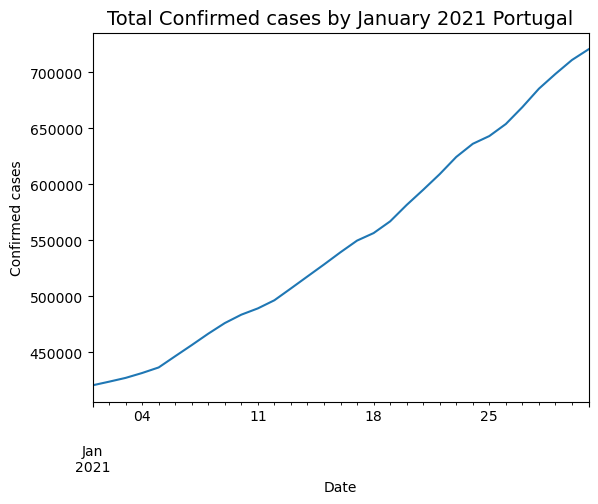

In [30]:
df.loc['Jan 2021','Confirmed'].plot(); 
plt.ylabel('Confirmed cases');
plt.title("Total Confirmed cases by January 2021 Portugal", size=14);
plt.show();

Are you interested in a particular range?

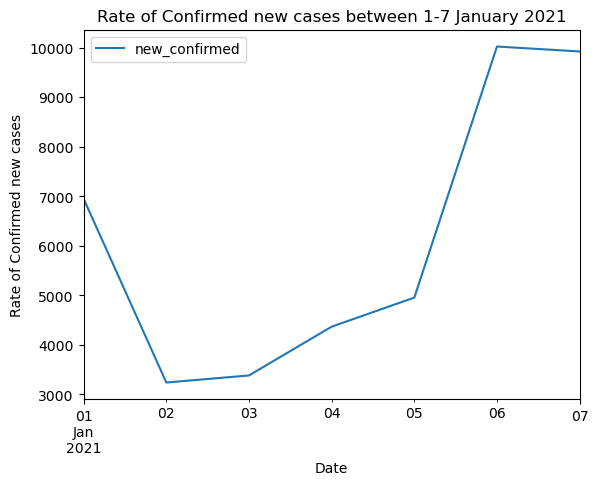

In [35]:
df.loc['Jan 1st 2021':'Jan 7th 2021'].new_confirmed.plot();  # <--- remember, American dates are less error prone in Pandas 
plt.ylabel('Rate of Confirmed new cases')
plt.title('Rate of Confirmed new cases between 1-7 January 2021')
plt.legend();

The rate of daily confirmed cases were slowing down in the first days of January but started going up shortly after

Let's save an interval for later

In [36]:
interval = slice('2021 Jan 3rd','2021 January 31st') # Also works with hours minutes and seconds! but this data does not have that info

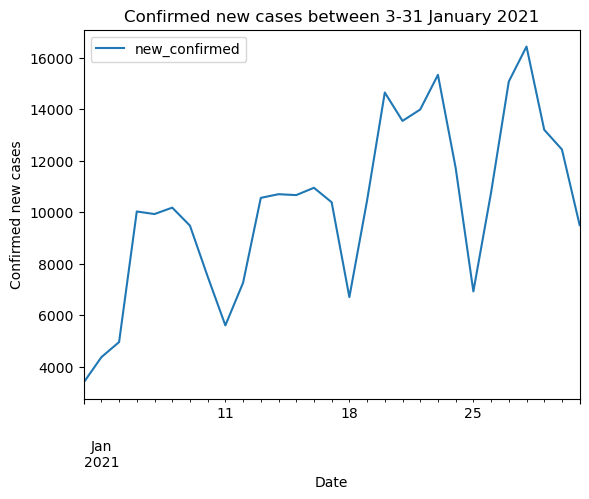

In [37]:
df.loc[interval].new_confirmed.plot();  
plt.ylabel('Confirmed new cases')
plt.title('Confirmed new cases between 3-31 January 2021')
plt.legend();

# Resample

## Using resample to organize your timeseries

We can check if our dataset is actually daily

In [40]:
df.index.freq

This returns nothing which means we don't have any particular pattern like 'daily', 'hourly', etc..

But a quick look into our data, it seems that it is daily, so what is missing?

In [45]:
resampled_df = df.resample('D').asfreq()

# Check for NaN values
missing_dates = resampled_df[resampled_df.isna().all(axis=1)].index

In [46]:
missing_dates

DatetimeIndex(['2020-02-12', '2020-03-11', '2020-03-15', '2020-05-02',
               '2020-06-07', '2020-09-02', '2020-09-11', '2020-09-13',
               '2020-10-14', '2020-11-10', '2020-11-16', '2020-12-14',
               '2021-02-19', '2021-03-09', '2021-03-25', '2021-05-13',
               '2021-05-16', '2021-09-01', '2021-09-09', '2021-09-23',
               '2021-11-04', '2021-11-19', '2021-12-13', '2022-01-04',
               '2022-03-09'],
              dtype='datetime64[ns]', name='Date', freq=None)

Let's change our data to daily

In [49]:
df.resample('D')

In [53]:
df = df.resample('D').asfreq()

In [54]:
df.index.freq

<Day>

Hurray! We have daily data now

## Weekly data

Let's say you want weekly data, how can we have that?

In [55]:
interval

slice('2021 Jan 3rd', '2021 January 31st', None)

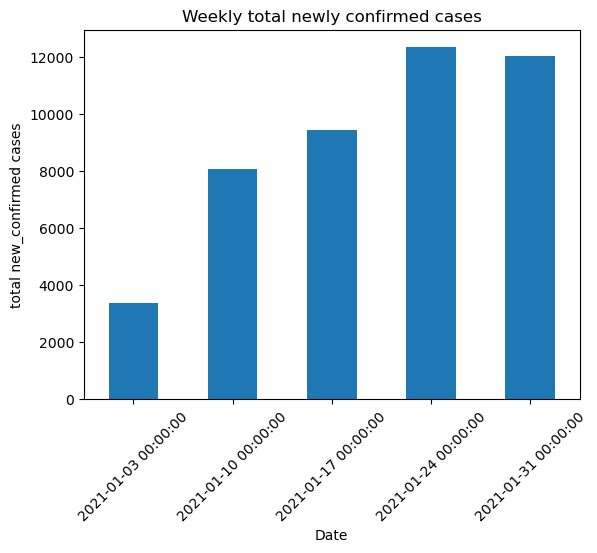

In [57]:
df.loc[interval,'new_confirmed'].resample('W').mean().plot.bar(rot=45);
plt.ylabel('total new_confirmed cases');
plt.title('Weekly total newly confirmed cases');
plt.show();

> how many new confirmed cases did we have in the largest weekly peak?

In [59]:
confirmed = df.loc[interval]['new_confirmed'].resample('W').sum().max()

print('In a week in Portugal, there were %0.1f confirmed cases' % confirmed)

In a week in Portugal, there were 86389.0 confirmed cases


> What if i'm interested in the average?

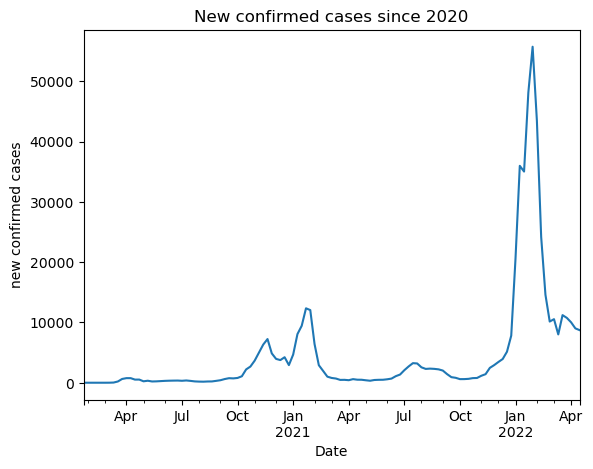

In [60]:
df.resample('W').new_confirmed.mean().plot();  # the mean weekly new confirmed cases since 2020 till April 2022
plt.ylabel('new confirmed cases');
plt.title('New confirmed cases since 2020');
plt.show();

> How many confirmed cases did Portugal have?

In [62]:
df.head(3)

,Country/Region,Province/State,Confirmed,Recovered,Deaths,new_confirmed,new_deaths,new_recovered
Date,,,,,,,,
2020-01-22,Portugal,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,Portugal,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,Portugal,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df['new_confirmed'].sum() # 3.7 million

3719485.0

One cooler way to see this over time is to use the cumulative sum:

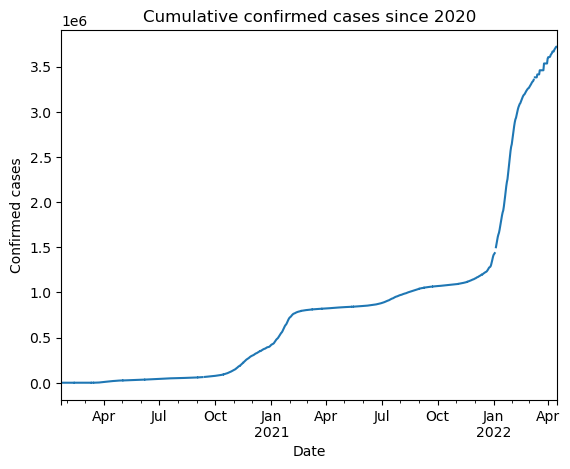

In [65]:
df['new_confirmed'].cumsum().plot();  # the total volume traded since the start 
plt.ylabel('Confirmed cases');
plt.title('Cumulative confirmed cases since 2020');
plt.show();


As you've learnt before, there are many cool methods for [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html).

Let's say we want to know "what was the record for total recovered per week, over time?" Naturally the record can only go up, and will have some "steps".

In [67]:
pd.Series([1,5, 4, 9, 7]).cummax()

0    1
1    5
2    5
3    9
4    9
dtype: int64

<Axes: xlabel='Date'>

Text(0, 0.5, 'new recovered')

Text(0.5, 1.0, 'Cumulative new recovered 2020')

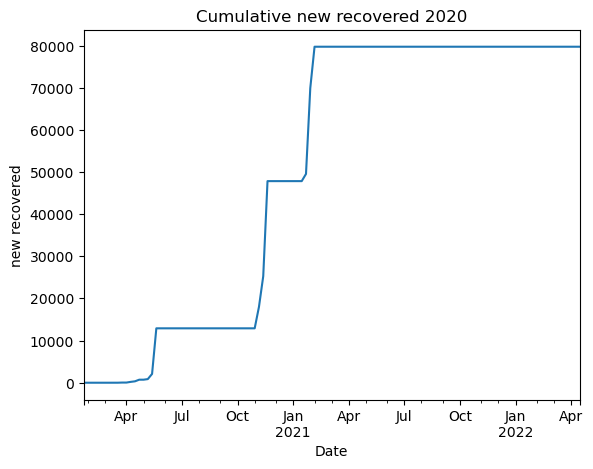

In [68]:
df['new_recovered'].resample('W').sum().cummax().plot();
plt.ylabel('new recovered')
plt.title('Cumulative new recovered 2020')
plt.show()

A more important question however may be

 > " what were the biggest variations in deaths? "

For this, we might find it useful to calculate consecutive differences between periods, using diff

In [202]:
df.new_deaths.diff().iloc[400:405] # Negatives means we had less deaths than the previous datapoint

Date
2021-02-25    -1.0
2021-02-26     9.0
2021-02-27   -25.0
2021-02-28     8.0
2021-03-01    -7.0
Name: new_deaths, dtype: float64

What do the diffs look like?

<Axes: xlabel='Date'>

Text(0, 0.5, 'Difference in new deaths')

Text(0.5, 1.0, 'Difference in new edaths between current and previous timestamp since 2020')

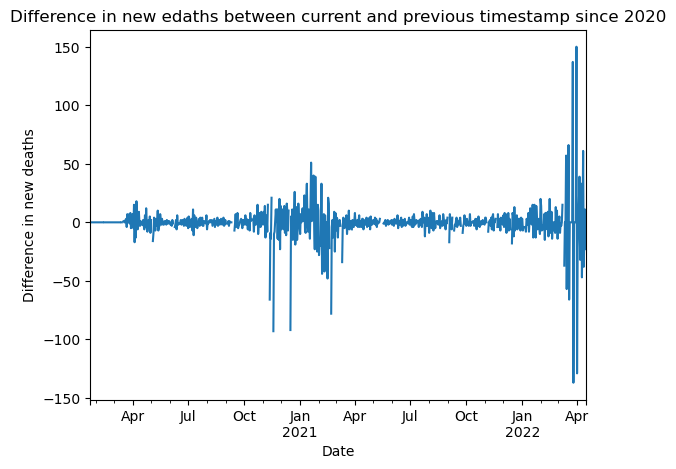

In [70]:
df.new_deaths.diff().plot();
plt.ylabel('Difference in new deaths');
plt.title('Difference in new edaths between current and previous timestamp since 2020');
plt.show()

Not particularly useful. How about on a particular month?

<Axes: xlabel='Date'>

Text(0.5, 1.0, 'Difference in new deaths between currrent and previous timestamp on May 2021')

Text(0, 0.5, 'Difference in New deaths')

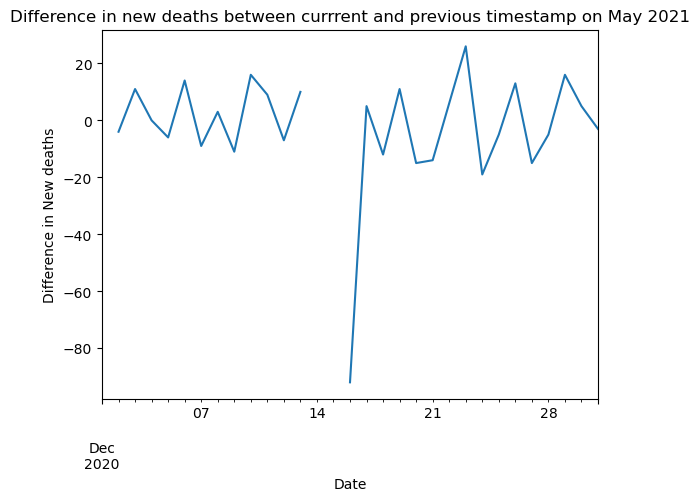

In [74]:
df.loc['December 2020'].new_deaths.diff(periods=1).plot();
plt.title('Difference in new deaths between currrent and previous timestamp on May 2021')
plt.ylabel('Difference in New deaths')

Let's take a look at the days following 19th of December 2020

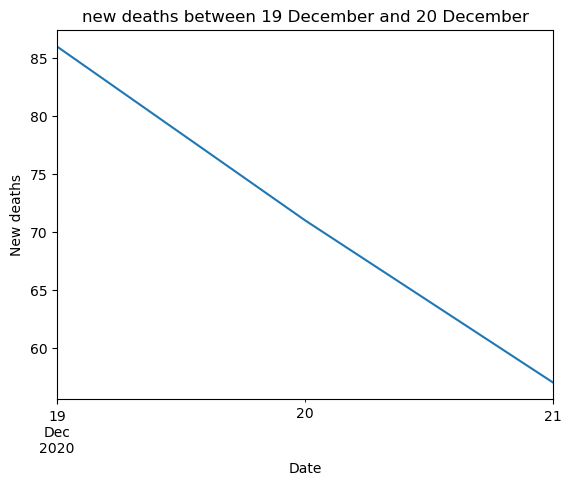

In [230]:
df.loc['Dec 19th 2020':'Dec 21 2020', 'new_deaths'].plot();
plt.title('new deaths between 19 December and 20 December');
plt.ylabel('New deaths');

![](media/alright.jpg)

A couple days later the charts show this

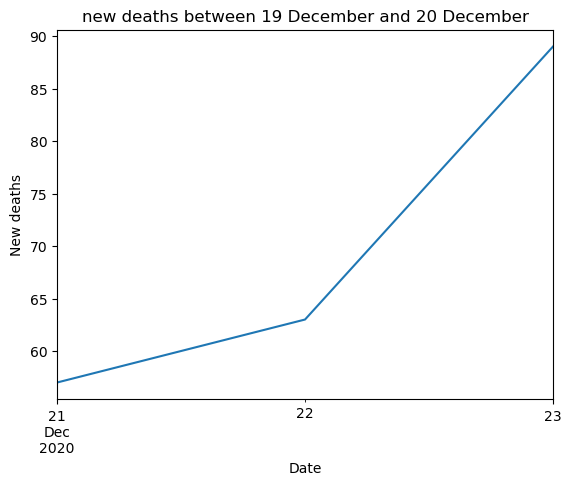

In [228]:
df.loc['Dec 21th 2020':'Dec 23 2020', 'new_deaths'].plot();
plt.title('new deaths between 19 December and 20 December');
plt.ylabel('New deaths');

![](media/tarde.jpg)

A few more days pass...

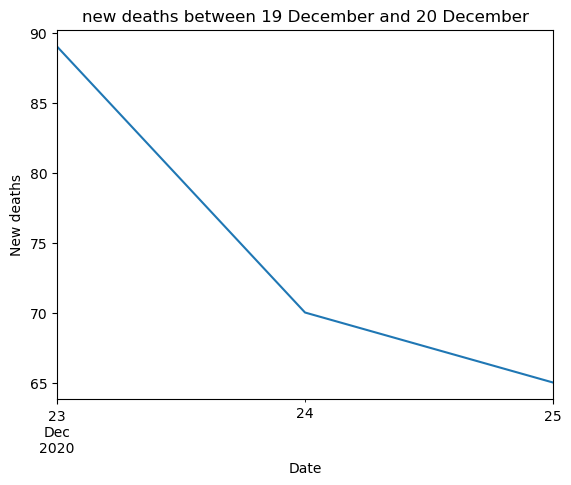

In [229]:
df.loc['Dec 23th 2020':'Dec 25 2020', 'new_deaths'].plot();
plt.title('new deaths between 19 December and 20 December');
plt.ylabel('New deaths');

![](media/alright.jpg)

I think you get the picture. What's going on is that we're being extremely reactive to noise, and missing the underlying process. What is in fact going on is that we are in a free-fall, but it might not be obvious unless we look at the slightly broader picture.

In other words, assuming there is an underlying process, we can assume the recent past should carry some weight. How much weight? A rolling [window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) of weight!

In [76]:
# this is just the raw data, so we can apply a rolling window on it  
december_deaths = df.loc['Dec 15 2020': 'Dec 25 2020', 'new_deaths']

# notice the window size as a parameter of rolling, feel free to mess around with that parameter 
# and the center set to False. That's because we don't want to use data from the future! 
# Also notice how we use the mean. We can use many others. Try changing it! 
window_size = 5
december_rolling_window = december_deaths.rolling(window=window_size, center=False).mean()

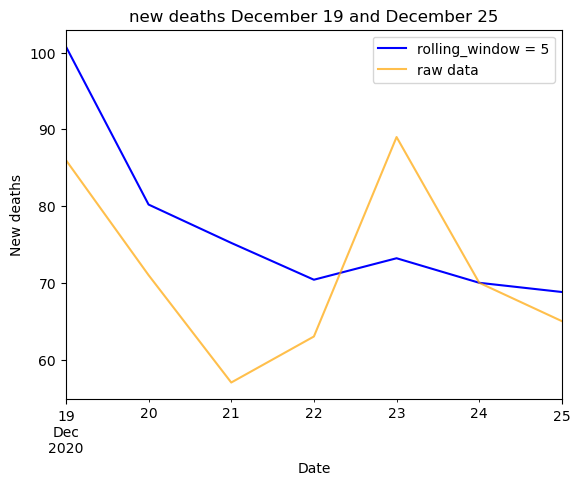

In [79]:
# Let's plot these together 
interval = slice('Dec 19 2020', 'Dec 25 2020')

december_rolling_window.loc[interval].plot(color='b', label='rolling_window = %0.0f' % window_size);
december_deaths.loc[interval].plot(label='raw data', alpha=.7, ls='-', color='orange');
plt.ylabel('New deaths');
plt.title('new deaths December 19 and December 25');
plt.legend();
plt.show();

<Axes: xlabel='Date'>

<Axes: xlabel='Date'>

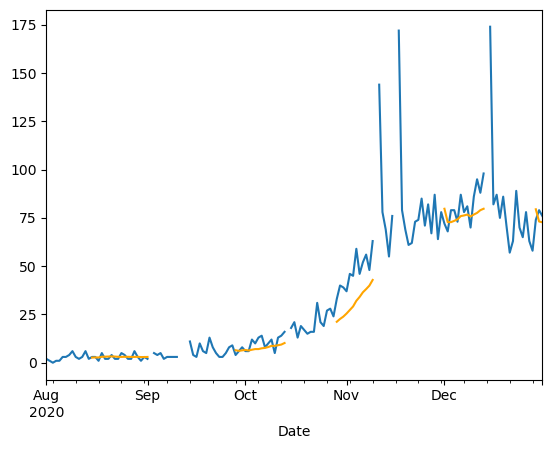

In [82]:
data = df.loc['August 2020': 'December 2020', 'new_deaths']
window = data.rolling(window=15, center=False).mean()

data.plot()
window.plot(color='orange')

As you can see, the rolling mean appears as a smoother version of the original signal, this can be a great help when looking at noisy signals and you just want to get an idea of the overall trend. Also note that when doing the rolling mean you get a delayed version of the original signal, due to the nature of how it is calculated.

Both rolling windows and resampling methods transform timeseries. If you still have doubts about the difference between them consult section 'Time-aware rolling vs. resampling' of pandas [computation](https://pandas.pydata.org/pandas-docs/version/1.1.5/user_guide/computation.html#time-aware-rolling-vs-resampling).

# Let's ask some questions to this dataset

> What was the weekly change confirmed cases, over time?

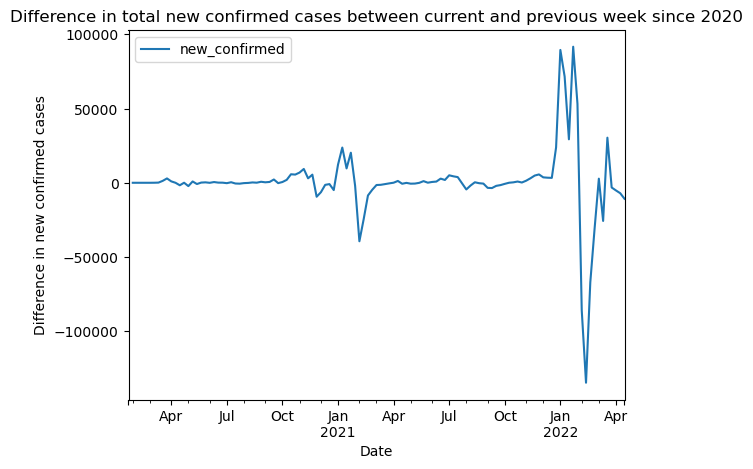

In [83]:
# resample to weekly, get the mean Close price (per week), calculate the differences, and plot them 
df.resample('W').new_confirmed.sum().diff(periods=1).plot();
plt.ylabel('Difference in new confirmed cases')
plt.title('Difference in total new confirmed cases between current and previous week since 2020')
plt.legend();

We are observing something that makes sense. As the magnitude gets bigger, so does the volatility. It makes more sense for weekly new confirmed cases to go down 50k  in a week when it was 100k than when it was at 10k for example

What we actually want... is the `percent change`.

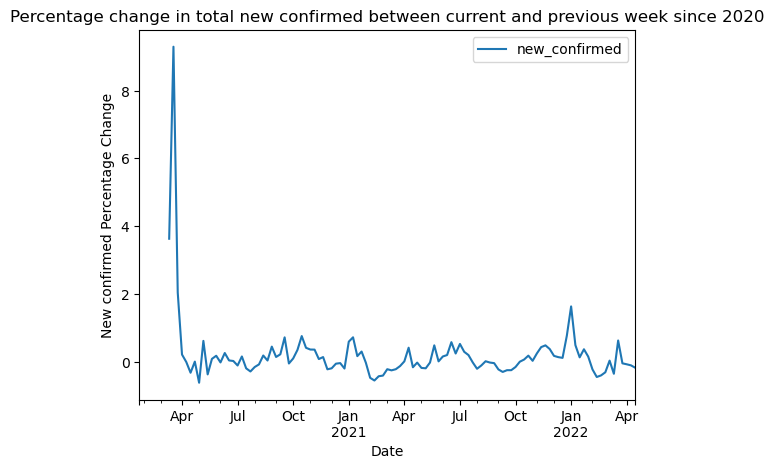

In [84]:
# resample to weekly, take the total new confirmed (weekly), and calculate the percentage change 
df.resample('W').new_confirmed.sum().pct_change().plot()
plt.ylabel('New confirmed Percentage Change')
plt.title('Percentage change in total new confirmed between current and previous week since 2020')
plt.legend();

Interestingly enough, this chart seems to tell us that while the new confirmed cases varies a lot, it is relatively consistent, with weekly variations of +/- 1% being as big as it gets. As the magnitude becoming larger it becomes more newsworthy "up 20k confirmed cases!!!", but the underlying percent change doesn't seem so radically altered.



<Axes: xlabel='Date'>

Text(0, 0.5, 'New deaths Percentage Change')

Text(0.5, 1.0, 'Percentage change in total new deaths between current and previous week since 2020')

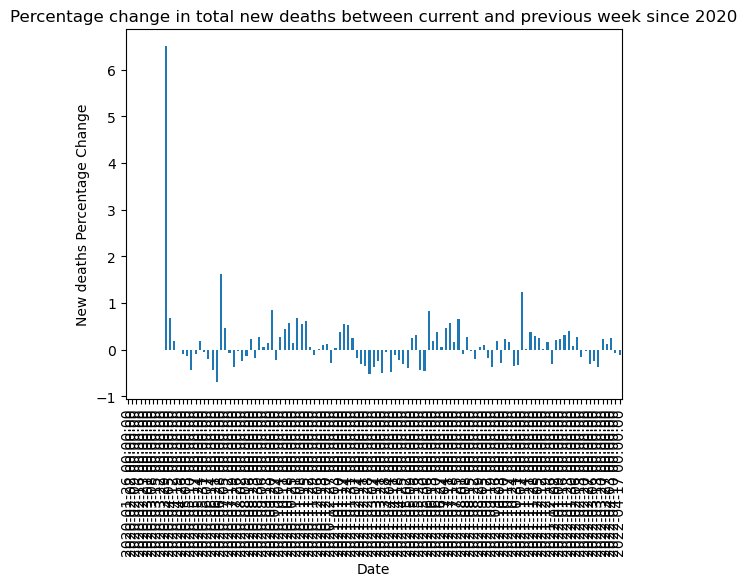

In [85]:
df.resample('W').new_deaths.mean().pct_change().plot(kind='bar');
plt.ylabel('New deaths Percentage Change')
plt.title('Percentage change in total new deaths between current and previous week since 2020')
plt.show()

Wow that is one ugly X axis. Unfortunately this is a [known issue](https://stackoverflow.com/questions/19143857/bar-plot-xtick-frequency?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa) with Pandas, and when it happens, it requires a bit of copy-pasting around to fix.

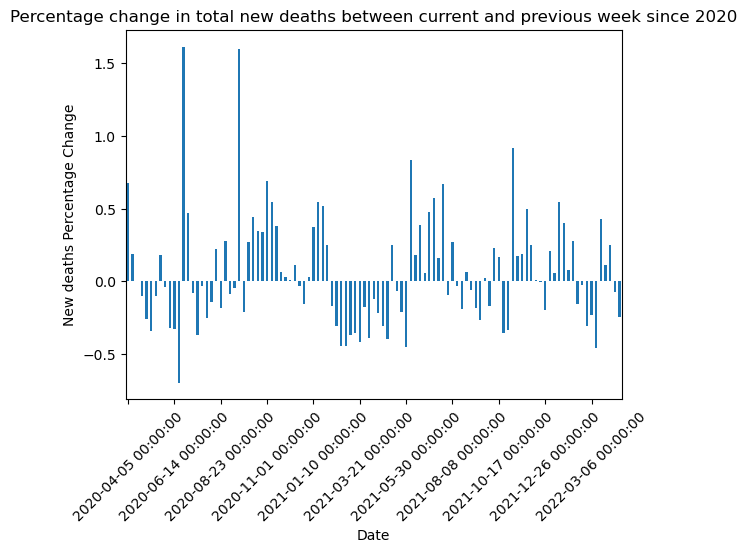

In [88]:
# our actual chart 
ax = df.resample('W').new_deaths.sum().pct_change().dropna().iloc[2:].plot(kind='bar', rot=45);

# this fixes the axis. 
# I wouldn't spend too much time in this horrible Matplotlib code, just know it exists. 

n = 10
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]  # <---- blearghk!!
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])

plt.ylabel('New deaths Percentage Change')
plt.title('Percentage change in total new deaths between current and previous week since 2020')
plt.show();

# Summary of what we have learned in this Notebook

- **pd.to_datetime()** - this allows you to create datetime format and gives you access to several methods that pandas has specifically to handle dates
- We need to have a datetime sorted index!!
- **Selection**: dataframe.loc['Jan 17th 2020] to select the 17th of January, 2020
- Remember pandas is really helpful here as you can even do something like `dataframe.loc['Jan 2020']` or even ranges `dataframe.loc['01/15/2020':'01/22/2020']`
- using `resample().asfreq()` to force your timeseries to be in a particular frequency
- If you're going to analyse the same interval several times, then using slice() can help a lot.
- How to `resample`, e.g: `.resample('W').sum()`. It also works for other periods that we haven't tested here like `.resample('5 min').sum()`.  Don't forget that after resampling we need an aggregation function!
- few new aggregation functions that we've talked:
    - cumsum()
    - cummax()
- We have also learnt how to calculate the difference between periods, using `diff()`
- Rolling windows: `.rolling()` that allows us to specify the rolling window size and the aggregation function.